# Scenarios

To demonstrate the use of your simulator, you will produce a Jupyter
Notebook that performs the following scenarios, each consisting of a set
of tasks:

In [14]:
!ls -lR

.:
total 152
drwxr-sr-x 4 kzk8qq users  2048 Nov  8 17:55 Demo
drwxr-sr-x 2 kzk8qq users  2560 Nov  8 17:54 Demo.egg-info
-rw-r--r-- 1 kzk8qq users   555 Nov  7 19:49 dummycode.ipynb
-rw-r--r-- 1 kzk8qq users 17774 Oct 31 11:12 FinalProjectInstructions.ipynb
-rw-r--r-- 1 kzk8qq users  1086 Oct 31 14:14 LICENSE
-rw-r--r-- 1 kzk8qq users 13465 Oct 31 16:21 M08-HW-1-1.ipynb
-rw-r--r-- 1 kzk8qq users 40159 Nov  8 17:55 montecarlo_demo.ipynb
drwxr-sr-x 3 kzk8qq users  2048 Nov  8 17:30 montecarlo py storage
-rw-r--r-- 1 kzk8qq users  3130 Nov  7 18:31 montecarlo_test.py
-rw-r--r-- 1 kzk8qq users   667 Nov  7 19:46 montecarlo_test_results.txt
-rw-r--r-- 1 kzk8qq users   255 Oct 31 16:18 notes.txt
drwxr-sr-x 2 kzk8qq users   512 Oct 31 16:53 __pycache__
-rw-r--r-- 1 kzk8qq users    49 Oct 31 14:14 README.md
-rw-r--r-- 1 kzk8qq users   348 Nov  6 11:29 setup.py
-rw-r--r-- 1 kzk8qq users  9932 Nov  8 15:40 Untitled.ipynb

./Demo:
total 20
-rw-r--r-- 1 kzk8qq users   48 Nov  7 18:37 __init__.py


In [15]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/kzk8qq/Documents/MSDS/DS5100/kzk8qq_ds5100_montecarlo
  Attempting uninstall: Demo
    Found existing installation: Demo 0.1
    Uninstalling Demo-0.1:
      Successfully uninstalled Demo-0.1
  Running setup.py develop for Demo


## Scenario 1: A 2-headed Coin

1.  Create a fair coin (with faces $H$ and $T$) and one unfair coin in
    which one of the faces has a weight of $5$ and the others $1$.

2.  Play a game of $1000$ flips with two fair dice.

3.  Play another game (using a new Game object) of $1000$ flips, this
    time using two unfair dice and one fair die. For the second unfair
    die, you can use the same die object twice in the list of dice you
    pass to the Game object.

4.  For each game, use an Analyzer object to determine the raw frequency
    of jackpots — i.e. getting either all $H$s or all $T$s.

5.  For each analyzer, compute relative frequency as the number of
    jackpots over the total number of rolls.

6.  Show your results, comparing the two relative frequencies, in a
    simple bar chart.

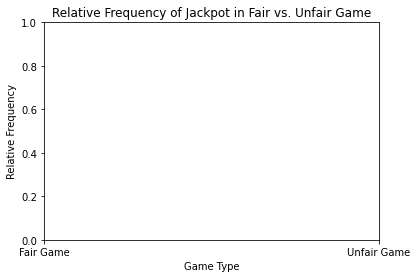

ValueError: Passed value is not a Game Object!!

In [26]:
from Demo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


create_die = lambda faces, weights=None, is_coin=False: Die(faces, weights, is_coin)
play_game = lambda dice_list, times: Game(dice_list).play(times)
analyze_game = lambda game, total_rolls: (Analyzer(game).jackpot(), Analyzer(game).relative_frequency(Analyzer(game).jackpot(), total_rolls))
visualize = lambda labels, frequencies: plt.bar(np.arange(len(labels)), frequencies, color=['blue', 'orange']), plt.xlabel('Game Type'), plt.ylabel('Relative Frequency'), plt.title('Relative Frequency of Jackpot in Fair vs. Unfair Game'), plt.xticks(np.arange(len(labels)), labels), plt.show()


# Create a fair and an unfair coin
fair_coin = create_die(np.array(['H', 'T']))
unfair_coin = create_die(np.array(['H', 'T']), weights=[1, 5])

# Play a game with two fair dice
game_fair = play_game([fair_coin, fair_coin], 1000)
jackpots_fair, relative_frequency_fair = analyze_game(game_fair, 1000)

# Play a game with two unfair dice and one fair die
game_unfair = play_game([fair_coin, fair_coin, unfair_coin], 1000)
jackpots_unfair, relative_frequency_unfair = analyze_game(game_unfair, 1000)

# Visualization
labels = ['Fair Game', 'Unfair Game']
frequencies = [relative_frequency_fair, relative_frequency_unfair]

visualize(labels, frequencies)


## Scenario 2: A 6-sided Die

1.  Create three dice, each with six sides having the faces $1$ through
    $6$.

2.  Convert one die to an unfair one by weighting the face $6$ five
    times more than the other weights (i.e. it has weight of $5$ and the
    others a weight of $1$ each).

3.  Convert another die to be unfair by weighting the face $1$ five
    times more than the others.

4.  Play a game of $10000$ rolls with $5$ fair dice.

5.  Play a game of $10000$ rolls with $2$ unfair dice, one as defined in
    steps #2 and #3 respectively, and $3$ fair dice.

6.  For each game, use an Analyzer object to determine the relative
    frequency of jackpots and show your results, comparing the two
    relative frequencies, in a simple bar chart.

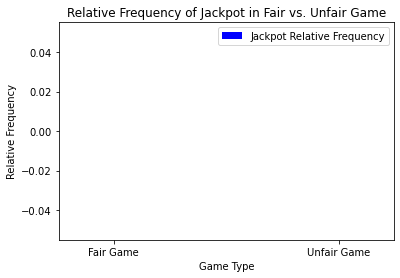

In [20]:
# Create fair and unfair dice
fair_dice = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_dice_1 = Die(np.array([1, 2, 3, 4, 5, 6]), W=[1, 1, 1, 1, 1, 5])
unfair_dice_2 = Die(np.array([1, 2, 3, 4, 5, 6]), W=[5, 1, 1, 1, 1, 1])

# Play a game with 5 fair dice for 10000 rolls
fair_game_1 = Game([fair_dice, fair_dice, fair_dice, fair_dice, fair_dice])
fair_game_1.play(10000)
fair_analyzer_1 = Analyzer(fair_game_1)
fair_jackpot_frequency_1 = fair_analyzer_1.jackpot() / 10000

# Play a game with 2 unfair dice and 3 fair dice for 10000 rolls
unfair_game_2 = Game([unfair_dice_1, unfair_dice_2, fair_dice, fair_dice, fair_dice])
unfair_game_2.play(10000)
unfair_analyzer_2 = Analyzer(unfair_game_2)
unfair_jackpot_frequency_2 = unfair_analyzer_2.jackpot() / 10000

# Visualization
labels = ['Fair Game', 'Unfair Game']
frequencies = [fair_jackpot_frequency_1, unfair_jackpot_frequency_2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, frequencies, width, label='Jackpot Relative Frequency', color=['blue', 'orange'])

ax.set_xlabel('Game Type')
ax.set_ylabel('Relative Frequency')
ax.set_title('Relative Frequency of Jackpot in Fair vs. Unfair Game')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



## Scenario 3: The Roman Alphabet

1.  Create a “die” of letters from $A$ to $Z$ with weights based on
    their frequency of usage as found in the data file
    `data/english_letters.txt`. Use the frequencies (i.e. raw counts) as
    weights.

2.  Play a game involving $4$ of these dice with $1000$ rolls.

3.  Determine how many distinct permutations in your results are actual
    English words, based on the vocabulary found in
    `data/scrabble_words.txt`.

4.  Repeat steps #2 and #3 using $5$ dice and compare the results. Which
    word length generates a higher percentage of English words?